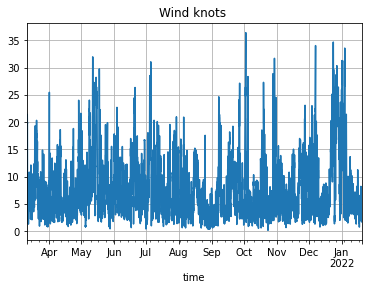

In [1]:
import pandas as pd

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_stations/ria_enm_windplus.csv",
                      usecols=["time","spd_udr"],parse_dates=["time"],index_col="time")

#resample mean  gust hour before km/h a m/s
station = station.resample("H",label="right",closed="right").mean()*0.277778

#label
labels = ["F0","F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","F11","F12"]
interval = pd.IntervalIndex.from_tuples([(-1, 0.5), (.5, 1.5), (1.5, 3.3),(3.3,5.5),
                                     (5.5,8),(8,10.7),(10.7,13.8),(13.8,17.1),
                                     (17.1,20.7),(20.7,24.4),(24.4,28.4),(28.4,32.6),(32.6,60)])
station["spd_udr_l"] = pd.cut(station.spd_udr, bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

#Show knots
(station.spd_udr*1.94384).plot(title="Wind knots ", grid=True);

**Meteorological model points**

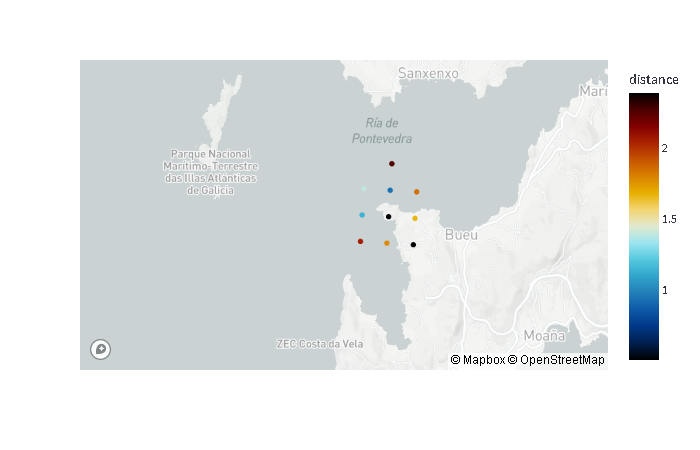

In [2]:
#Udra forecast and concat with station
met_model0 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/lat42.3394lon-8.8339p10R1KmD1.csv",
                         parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
df_all = pd.concat([station,met_model0],axis=1).dropna()
df_all = df_all.drop(columns=["spd_udr"])
df_all

,spd_udr_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2021-03-12 00:00:00,F2,279.054840,0.0,1251.362793,3.504231,3.619567,102440.171875,285.724243,0.766336,24050.791016,...,47.750000,-2.476438,0.100000,0.300000,0.0,0.300000,5612.219238,1535.963745,254.020630,273.278931
2021-03-12 01:00:00,F2,274.202576,0.0,1248.847290,3.575284,3.760854,102610.273438,284.845825,0.839504,24040.951172,...,86.709999,-0.550086,0.000000,0.600000,0.0,0.600000,5606.633789,1529.916138,253.733932,273.588501
2021-03-12 02:00:00,F2,307.992065,0.0,1176.645020,4.890311,5.566508,102591.695312,285.421631,0.826632,24046.685547,...,127.550003,-1.468750,0.000000,0.500000,0.0,0.500000,5593.544922,1526.968140,253.286819,272.640747
2021-03-12 03:00:00,F2,290.593384,0.0,1141.667725,5.053596,5.662030,102519.757812,285.445007,0.794363,24039.033203,...,125.589996,-0.000383,0.000000,0.189458,0.0,0.189458,5582.627930,1523.607544,253.200439,272.528870
2021-03-12 04:00:00,F2,275.568604,0.0,1106.988281,6.200126,6.871034,102421.054688,284.951813,0.776907,24038.275391,...,61.400002,-4.774656,0.000000,0.400000,0.0,0.400000,5563.532227,1519.895630,252.660873,272.257385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19 20:00:00,F2,47.236660,0.0,1766.653076,5.817563,6.661743,103215.304688,285.609741,0.635920,24135.000000,...,0.000000,0.000000,0.169044,0.000000,0.0,0.169044,5719.444824,1610.836548,252.625000,278.936798
2022-01-19 21:00:00,F2,35.032013,0.0,1787.929810,4.984383,5.764468,103222.007812,285.459930,0.630627,24135.000000,...,0.000000,0.000000,0.118611,0.000000,0.0,0.118611,5719.372559,1610.954102,252.470932,279.394623
2022-01-19 22:00:00,F2,32.511234,0.0,1815.733398,4.481787,5.026285,103217.398438,285.125427,0.639514,24135.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5718.312012,1610.876465,252.136246,279.790985


In [3]:
#label meteorological model variables dir0 and dir1
df_all["mod0_l"] = pd.cut(df_all["mod0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all["mod9_l"] = pd.cut(df_all["mod9"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all[["spd_udr_l","mod0_l","mod9_l"]]

,spd_udr_l,mod0_l,mod9_l
time,,,
2021-03-12 00:00:00,F2,F3,F3
2021-03-12 01:00:00,F2,F3,F3
2021-03-12 02:00:00,F2,F3,F4
2021-03-12 03:00:00,F2,F3,F3
2021-03-12 04:00:00,F2,F4,F4
...,...,...,...
2022-01-19 20:00:00,F2,F4,F3
2022-01-19 21:00:00,F2,F3,F3
2022-01-19 22:00:00,F2,F3,F4


**meteorological model score point 0**

In [5]:
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/distan_lat42.3394lon-8.8339p10R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
#px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           #color_continuous_scale=px.colors.cyclical.IceFire,)

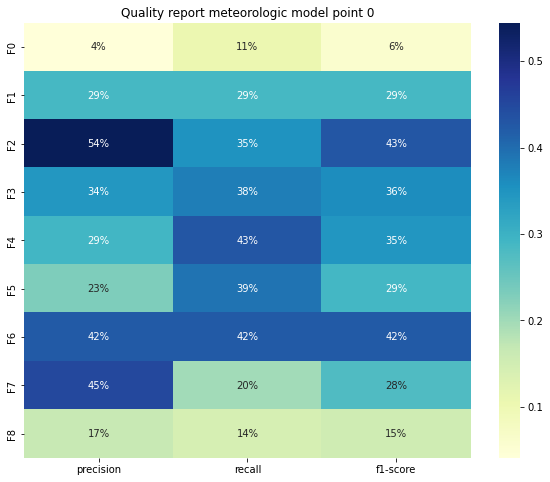

In [6]:
#meteorological model score point 0
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
plt.title("Quality report meteorologic model point 0")
cr = pd.DataFrame(classification_report(df_all.spd_udr_l, df_all.mod0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

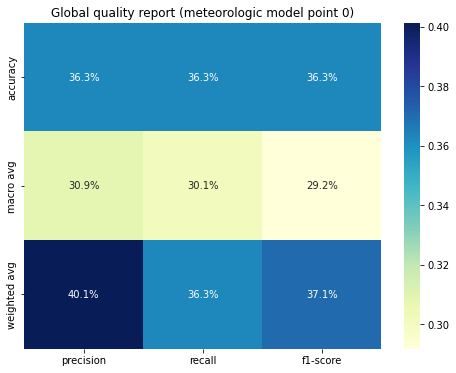

In [7]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 0)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

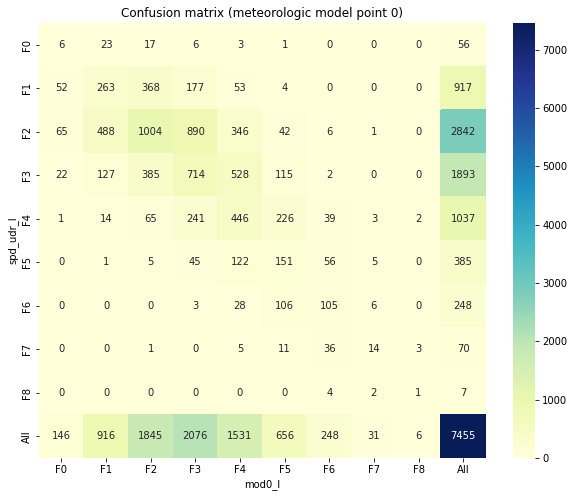

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Confusion matrix (meteorologic model point 0)")

global_sc = pd.crosstab(df_all.spd_udr_l, df_all.mod0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

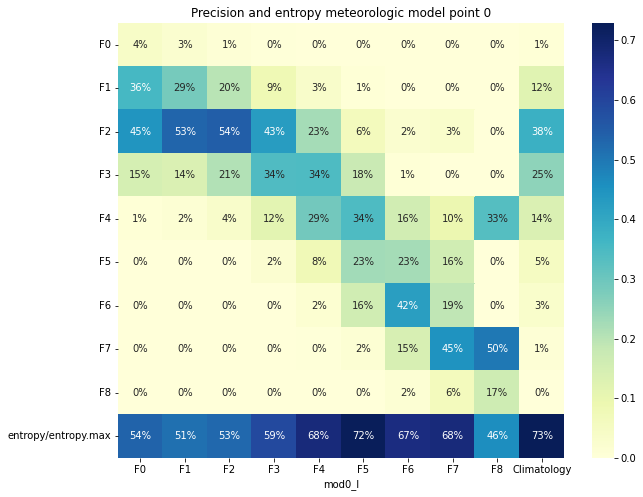

In [9]:
import math
from scipy.stats import entropy


plt.figure(figsize=(10, 8))
plt.title("Precision and entropy meteorologic model point 0")
column_sc = pd.crosstab(df_all.spd_udr_l, df_all.mod0_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**meteorological model score point 9**

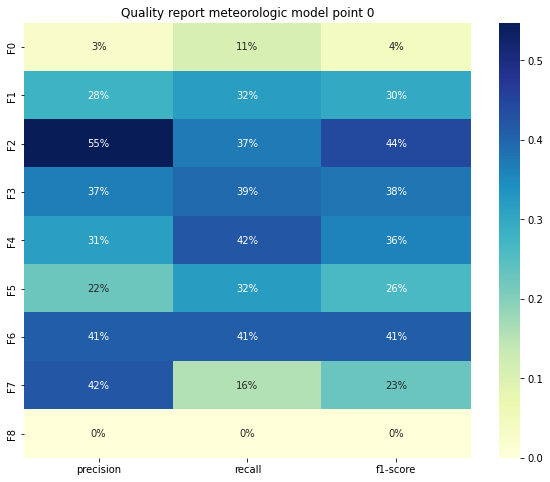

In [10]:
plt.figure(figsize=(10, 8))
plt.title("Quality report meteorologic model point 0")
cr = pd.DataFrame(classification_report(df_all.spd_udr_l, df_all.mod9_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

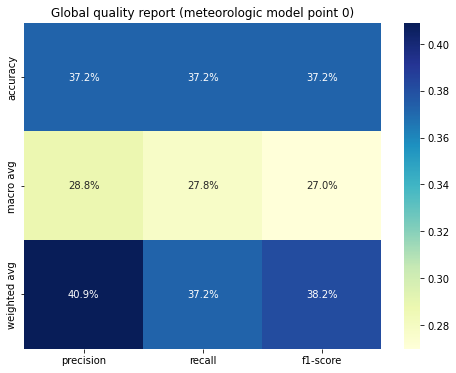

In [11]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 0)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

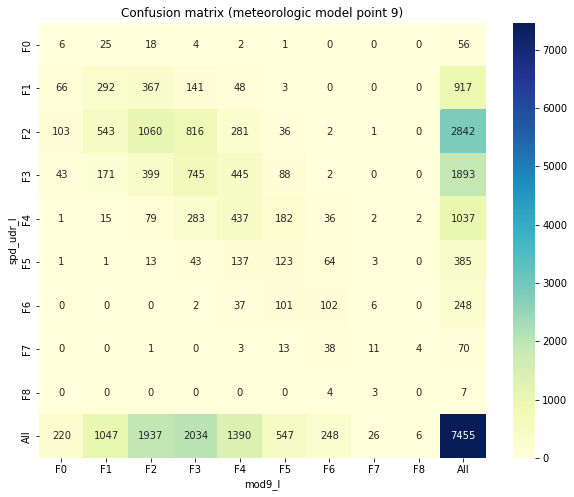

In [12]:
plt.figure(figsize=(10, 8))
plt.title("Confusion matrix (meteorologic model point 9)")

global_sc = pd.crosstab(df_all.spd_udr_l, df_all.mod9_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

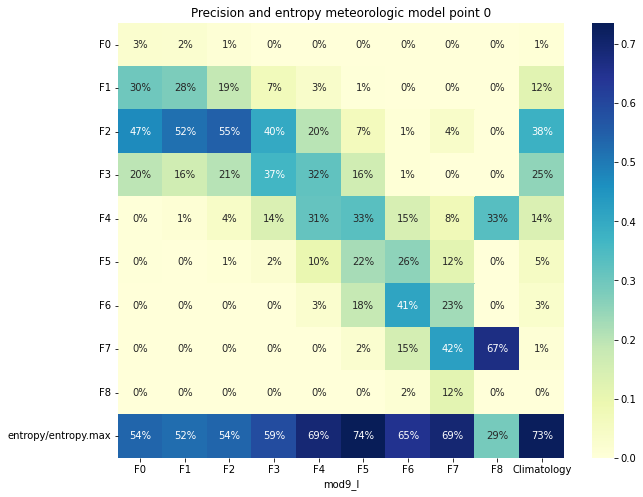

In [13]:
import math
from scipy.stats import entropy


plt.figure(figsize=(10, 8))
plt.title("Precision and entropy meteorologic model point 0")
column_sc = pd.crosstab(df_all.spd_udr_l, df_all.mod9_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**Machine learning**

In [ ]:
!pip install lazypredict

In [15]:
#X variables
df_all.iloc[:,1:-3].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'shflx9', 'cape9', 'cin9', 'cfh9', 'cfl9', 'cfm9', 'cft9', 'HGT5009',
       'HGT8509', 'T5009'],
      dtype='object', length=249)

In [16]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all.spd_udr_l
X = df_all.iloc[:,2:-3]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [04:50<00:00, 10.01s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.62,0.52,None,0.60,2.29
RandomForestClassifier,0.60,0.51,None,0.58,7.20
BaggingClassifier,0.53,0.46,None,0.52,13.01
ExtraTreeClassifier,0.46,0.45,None,0.46,0.11
NearestCentroid,0.27,0.43,None,0.30,0.14
BernoulliNB,0.29,0.41,None,0.34,0.15
GaussianNB,0.24,0.40,None,0.25,0.13
LGBMClassifier,0.59,0.39,None,0.57,47.22
LabelPropagation,0.50,0.35,None,0.55,1.91


In [17]:
#X columns only point 0
df_all.iloc[:,1:20].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0'],
      dtype='object')

**Machine learning LGBMClassifier**

In [25]:
import numpy as np
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# X and Y
Y = df_all.spd_udr_l
X = df_all.iloc[:,1:20]

# mean accuracy machine learning sample array
acc_ml = []

#seed random function
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  #ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  
  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("Accuracy mean of samples: ",acc_ml)



Confusion matrix  (Machine Learning)

col_0      F0  F1   F2   F3   F4  F5  F6  F7   All
spd_udr_l                                         
F0          0   3    5    1    0   0   0   0     9
F1          1  37   99   12    2   0   0   0   151
F2          0  34  280   56   12   1   0   0   383
F3          0   3   88  154   38   0   0   0   283
F4          0   0   25   60   88   9   1   0   183
F5          0   0    4    4   25  24   4   0    61
F6          0   0    0    0    5   4  24   1    34
F7          0   0    0    0    1   0   8   5    14
F8          0   0    0    0    0   0   1   0     1
All         1  77  501  287  171  38  38   6  1119

Quality report (Machine Learning)

              precision  recall  f1-score  support
F0                 0.00    0.00      0.00     9.00
F1                 0.48    0.25      0.32   151.00
F2                 0.56    0.73      0.63   383.00
F3                 0.54    0.54      0.54   283.00
F4                 0.51    0.48      0.50   183.00
F5     

**T test (1sample) compare machine learning mean accuracy in a sample (n=10) versus meteorological model mean accuracy at point 0 (38%). The alternative hypothesis is: the mean of the underlying distribution of the sample is greater than the given population mean (popmean). Significance level (alpha) = 0.01**

In [20]:
from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(acc_ml, popmean=0.38, alternative="greater")

print("\nalpha: ",alpha)

print("\naccuracy list from machine learning test:",acc_ml)
print("\n**** Point 0 ****")
print("\np_value point 0:",p_value0)
if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")


alpha:  0.01

accuracy list from machine learning test: [0.55, 0.58, 0.56, 0.58, 0.58, 0.58, 0.57, 0.58, 0.56, 0.58]

**** Point 0 ****

p_value point 0: 7.022916019891839e-13

we are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0

we are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0


**Machine learning extratreesclassifier**

In [21]:
# X and Y
Y = df_all.spd_udr_l
X = df_all.iloc[:,1:20]

# mean accuracy machine learning sample array
acc_ml_p = []

#seed random function
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  #ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml_p.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  
  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("Accuracy mean of samples: ",acc_ml_p)


Confusion matrix  (Machine Learning)

col_0      F1   F2   F3   F4  F5  F6  F7  F8   All
spd_udr_l                                         
F0          5    4    0    0   0   0   0   0     9
F1         42   97   10    2   0   0   0   0   151
F2         27  295   54    5   0   2   0   0   383
F3          0   90  162   31   0   0   0   0   283
F4          0   23   59   93   7   1   0   0   183
F5          0    3    4   27  19   8   0   0    61
F6          0    0    0    3   5  25   1   0    34
F7          0    0    0    0   0   8   5   1    14
F8          0    0    0    0   0   0   1   0     1
All        74  512  289  161  31  44   7   1  1119

Quality report (Machine Learning)

              precision  recall  f1-score  support
F0                 0.00    0.00      0.00     9.00
F1                 0.57    0.28      0.37   151.00
F2                 0.58    0.77      0.66   383.00
F3                 0.56    0.57      0.57   283.00
F4                 0.58    0.51      0.54   183.00
F5     

**T test two related samples. This is a test for the null hypothesis that two related samples have identical accuracy means. Alternative hypothesis the mean of the distribution underlying the sample with LGBMClassifier is less than the mean of the distribution underlying the sample with ExtratreesClassifier. Significance level (alpha) = 0.01**

In [22]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(acc_ml, acc_ml_p, alternative="less")

print("\nmeans with LGBMClassifier:", acc_ml)
print("\nmeans with extratreesclassifier:", acc_ml_p)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning with extratreesclassifier model = accuracy mean machine learning with LGBMClassifier model")
    print("\nwe are accepting alternative hypothesis: the mean of the sample with LGBMClassifier model is less than the mean of the sample with extratreesclassifier model")
else:
    print("\nwe are accepting null hypothesis:  H0: accuracy mean machine learning with extratreesclassifier model = accuracy mean machine learning with LGBMClassifier model")


means with LGBMClassifier: [0.55, 0.58, 0.56, 0.58, 0.58, 0.58, 0.57, 0.58, 0.56, 0.58]

means with extratreesclassifier: [0.57, 0.58, 0.57, 0.62, 0.57, 0.59, 0.6, 0.59, 0.59, 0.6]

alpha:  0.01

p_value point:  0.00419010298795023

we are rejecting null hypothesis  H0: accuracy mean machine learning with extratreesclassifier model = accuracy mean machine learning with LGBMClassifier model

we are accepting alternative hypothesis: the mean of the sample with LGBMClassifier model is less than the mean of the sample with extratreesclassifier model


**Save model**

In [23]:
X.columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0'],
      dtype='object')

In [26]:
import pickle
from sklearn.pipeline import Pipeline

x_var = X.columns
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("spd_udr_1km_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])
